In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
solar = pd.read_csv('project-sunroof-postal_code-09082017.csv', sep=",", encoding="ISO-8859-1", header=0)
solar.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,NaN,NaN,32.542257,32.542257,-117.030077,-117.030077,32.542257,-117.030077,1304.75,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.000000,0
1,1001.0,Massachusetts,42.099647,42.031153,-72.585478,-72.661521,42.067573,-72.623099,969.85,43,...,1.277903e+04,1.857622e+05,9.499651e+04,6.407655e+04,9.946072e+04,5866.558057,4.570750e+05,"[[0,22],[5,10],[10,6],[15,1],[20,1],[35,2],[55...",197.909043,0
2,1013.0,Massachusetts,42.197571,42.127819,-72.585709,-72.626135,42.162403,-72.607630,969.85,4548,...,1.403366e+06,1.668511e+07,8.920993e+06,7.583437e+06,2.689872e+07,6425.033374,6.149163e+07,"[[0,1847],[5,1763],[10,489],[15,150],[20,66],[...",26625.281247,10
3,1020.0,Massachusetts,42.218603,42.139015,-72.514267,-72.608908,42.176097,-72.574750,969.85,6310,...,2.884564e+06,2.185357e+07,1.561708e+07,1.473892e+07,5.168227e+07,6849.003143,1.067764e+08,"[[0,2291],[5,2435],[10,842],[15,292],[20,111],...",46233.148051,15
4,1022.0,Massachusetts,42.213156,42.178030,-72.530488,-72.575590,42.194646,-72.558203,969.85,638,...,2.246585e+06,5.434798e+06,4.445158e+06,3.264328e+06,3.271278e+07,12660.039972,4.810365e+07,"[[0,142],[5,145],[10,102],[15,68],[20,24],[25,...",20828.412212,2


In [3]:
list(solar)

['region_name',
 'state_name',
 'lat_max',
 'lat_min',
 'lng_max',
 'lng_min',
 'lat_avg',
 'lng_avg',
 'yearly_sunlight_kwh_kw_threshold_avg',
 'count_qualified',
 'percent_covered',
 'percent_qualified',
 'number_of_panels_n',
 'number_of_panels_s',
 'number_of_panels_e',
 'number_of_panels_w',
 'number_of_panels_f',
 'number_of_panels_median',
 'number_of_panels_total',
 'kw_median',
 'kw_total',
 'yearly_sunlight_kwh_n',
 'yearly_sunlight_kwh_s',
 'yearly_sunlight_kwh_e',
 'yearly_sunlight_kwh_w',
 'yearly_sunlight_kwh_f',
 'yearly_sunlight_kwh_median',
 'yearly_sunlight_kwh_total',
 'install_size_kw_buckets_json',
 'carbon_offset_metric_tons',
 'existing_installs_count']

In [4]:
(solar.isnull().sum()/len(solar))*100

region_name                             0.009415
state_name                              0.009415
lat_max                                 0.000000
lat_min                                 0.000000
lng_max                                 0.000000
lng_min                                 0.000000
lat_avg                                 0.000000
lng_avg                                 0.000000
yearly_sunlight_kwh_kw_threshold_avg    0.000000
count_qualified                         0.000000
percent_covered                         0.000000
percent_qualified                       0.000000
number_of_panels_n                      0.000000
number_of_panels_s                      0.000000
number_of_panels_e                      0.000000
number_of_panels_w                      0.000000
number_of_panels_f                      0.000000
number_of_panels_median                 0.338951
number_of_panels_total                  0.338951
kw_median                               0.338951
kw_total            

In [5]:
solar = solar.dropna(axis=0)

In [6]:
data = solar.drop_duplicates()
dataindex_col=0

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
solar['state_name']= le.fit_transform(solar['state_name'])

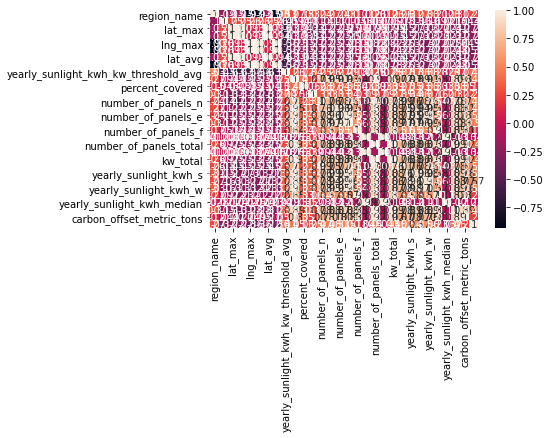

In [8]:
corrMatrix = solar.corr()
sns.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (34,34)
plt.show()

In [9]:
data = solar.drop_duplicates()
dataindex_col=0

In [10]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10585 entries, 1 to 10620
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   region_name                           10585 non-null  float64
 1   state_name                            10585 non-null  int32  
 2   lat_max                               10585 non-null  float64
 3   lat_min                               10585 non-null  float64
 4   lng_max                               10585 non-null  float64
 5   lng_min                               10585 non-null  float64
 6   lat_avg                               10585 non-null  float64
 7   lng_avg                               10585 non-null  float64
 8   yearly_sunlight_kwh_kw_threshold_avg  10585 non-null  float64
 9   count_qualified                       10585 non-null  int64  
 10  percent_covered                       10585 non-null  float64
 11  percent_qualifi

In [11]:
XY = solar[['kw_total','region_name','state_name','lat_max','yearly_sunlight_kwh_kw_threshold_avg','percent_covered','percent_qualified','number_of_panels_n','number_of_panels_s','kw_median','existing_installs_count']]
X  =  solar[['region_name','state_name','lat_max','yearly_sunlight_kwh_kw_threshold_avg','percent_covered','percent_qualified','number_of_panels_n','number_of_panels_s','kw_median','existing_installs_count']]
y = solar[['kw_total']]

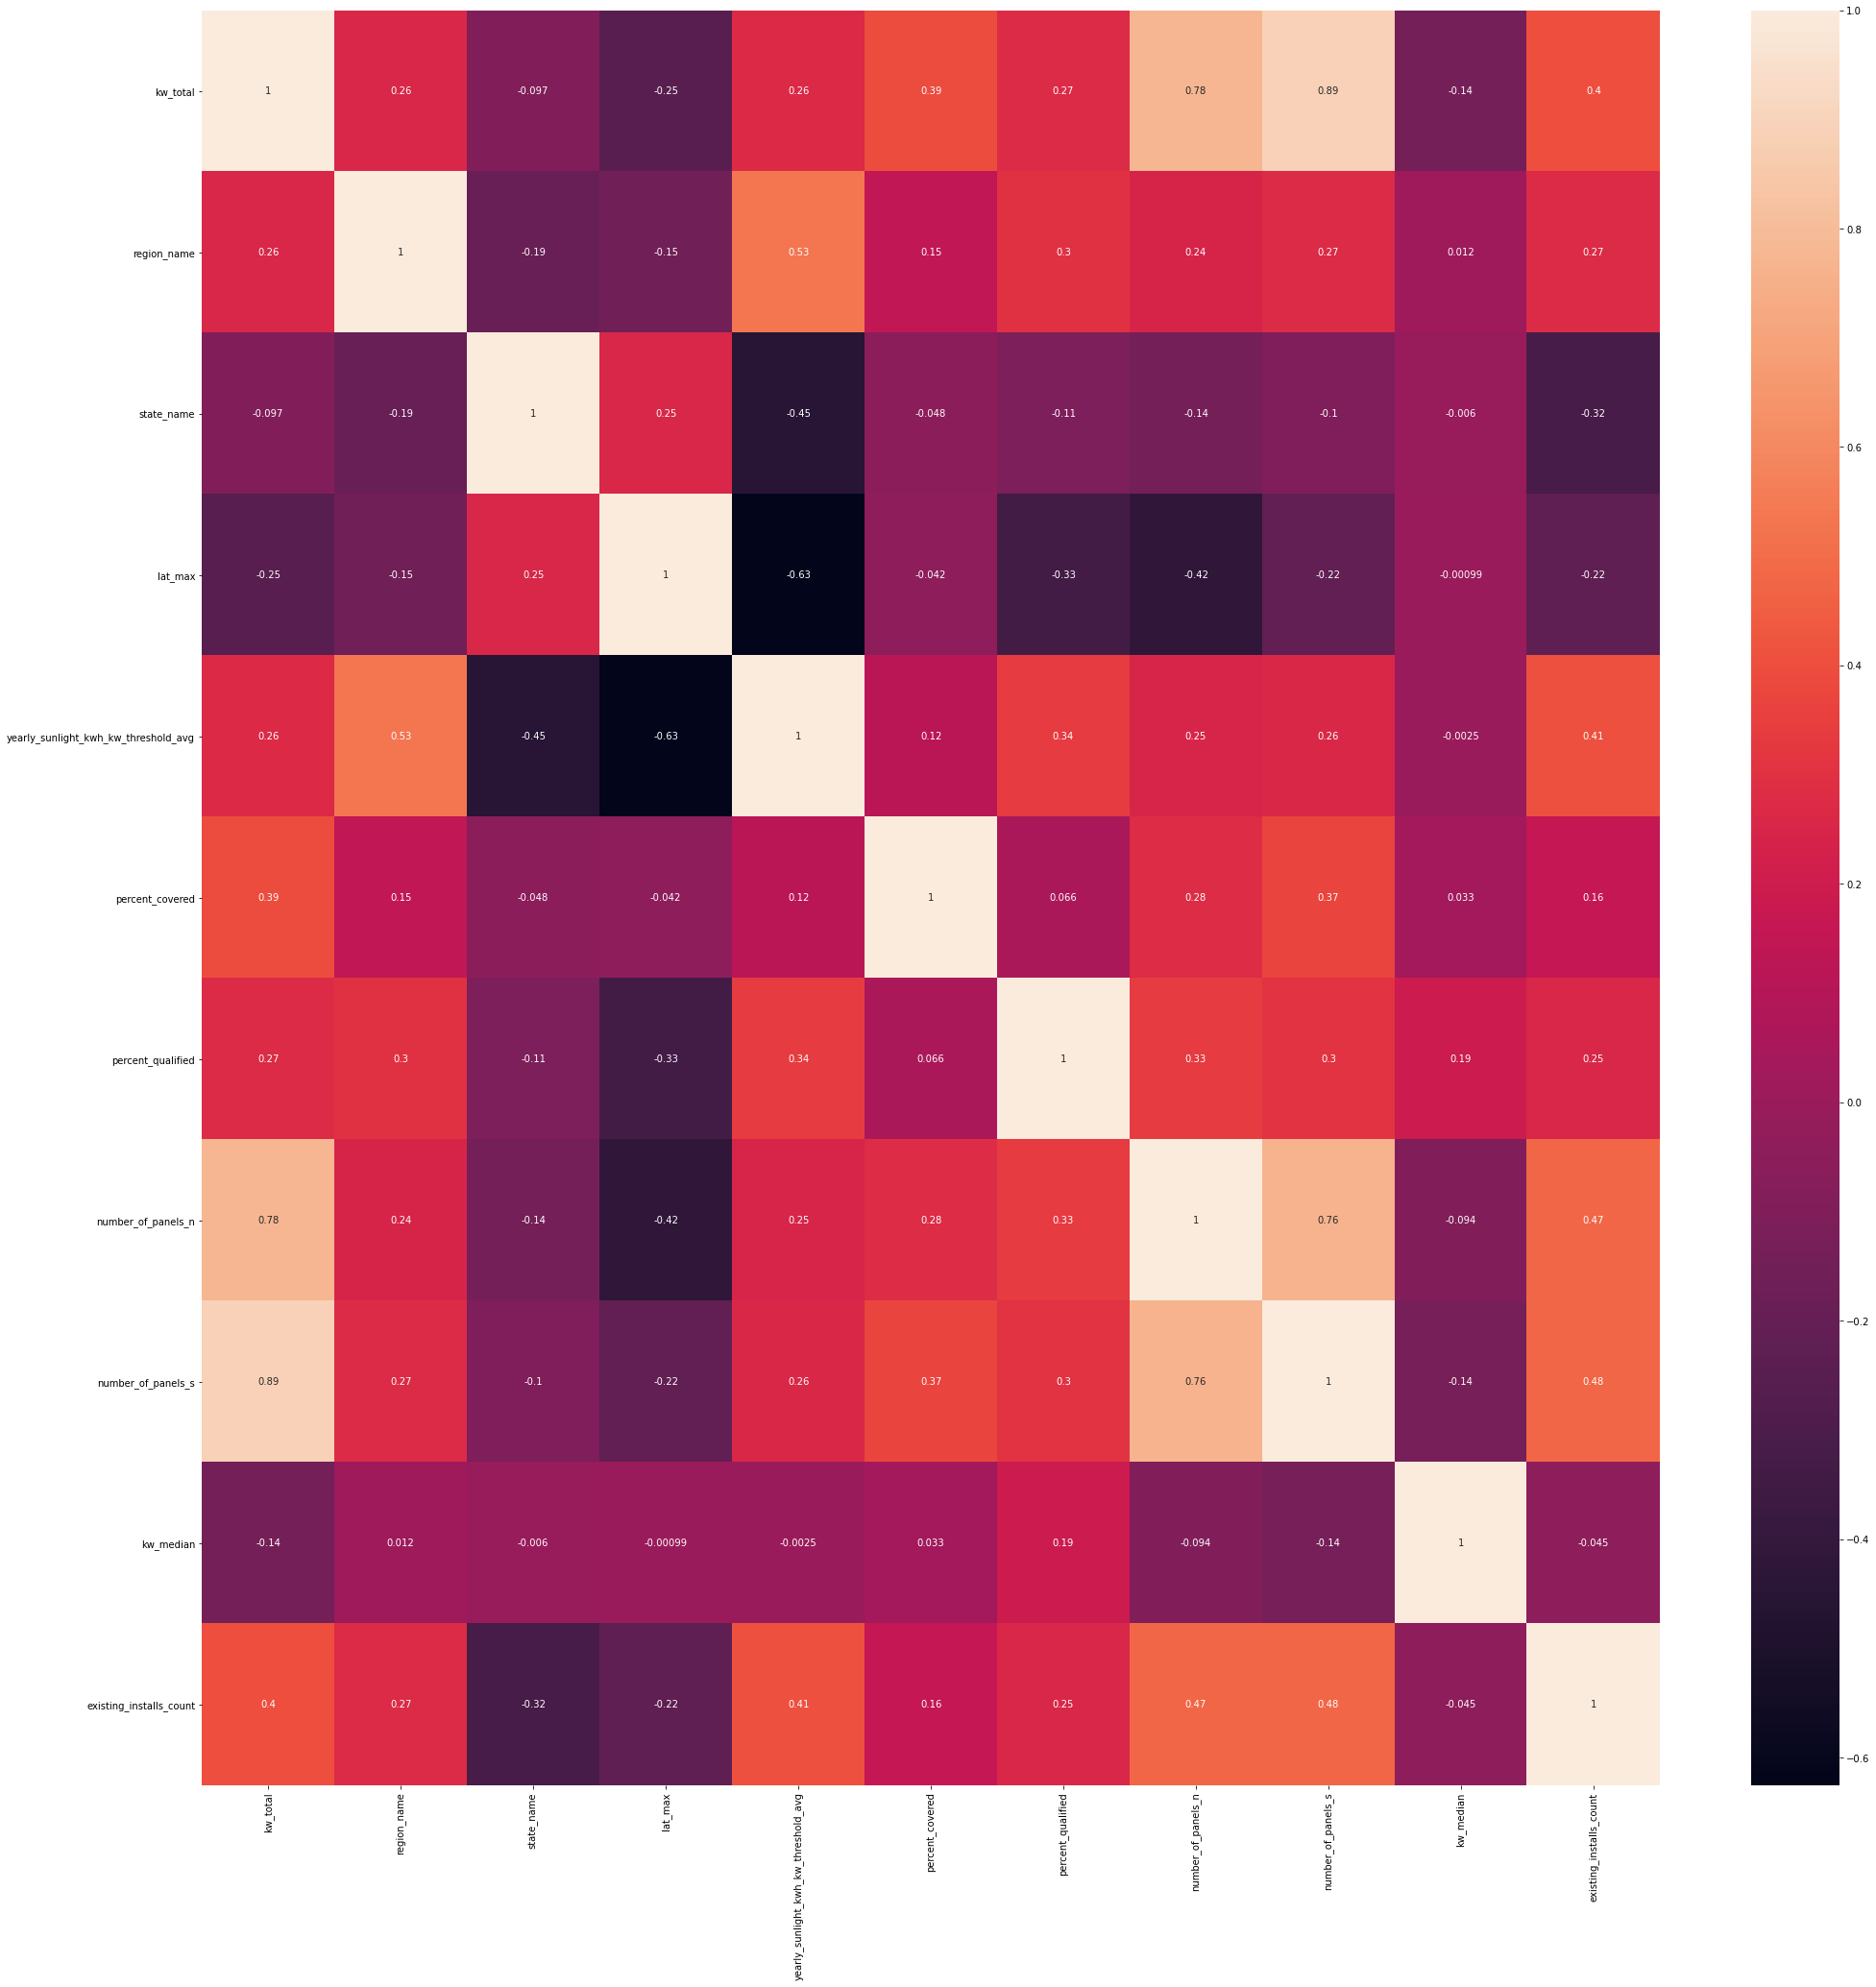

In [12]:
corrMatrix = XY.corr()
sns.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (34,34)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8468, 10) (2117, 10) (8468, 1) (2117, 1)


### Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

XY = solar[['kw_total','region_name','state_name','lat_max','yearly_sunlight_kwh_kw_threshold_avg','percent_covered','percent_qualified','number_of_panels_n','number_of_panels_s','kw_median','existing_installs_count']]
X  =  solar[['region_name','state_name','lat_max','yearly_sunlight_kwh_kw_threshold_avg','percent_covered','percent_qualified','number_of_panels_n','number_of_panels_s','kw_median','existing_installs_count']]
y = solar[['kw_total']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


lin.fit(X_train, y_train)
ylin_pred = lin.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,ylin_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,ylin_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,ylin_pred)))
print('R2 score:',metrics.r2_score(y_test, ylin_pred))

Mean Absolute Error: 20871.892505097345
Mean Squared Error: 1116549967.0619335
Root Mean Squared Error: 33414.81657980384
R2 score: 0.8114202683635442


### Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor
X  =  solar[['region_name','state_name','lat_max','yearly_sunlight_kwh_kw_threshold_avg','percent_covered','percent_qualified','number_of_panels_n','number_of_panels_s','kw_median','existing_installs_count']]
y = solar[['kw_total']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
classifier = RandomForestRegressor(n_estimators = 10)
classifier.fit(X_train, y_train.values.ravel())
yRand_pred = classifier.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,yRand_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,yRand_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,yRand_pred)))
print('R2 score:',metrics.r2_score(y_test, yRand_pred))

Mean Absolute Error: 20227.814182805858
Mean Squared Error: 1131509472.1024265
Root Mean Squared Error: 33637.91717842272
R2 score: 0.808893682425457


### Decision Tree Regressor

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

XY = solar[['kw_total','region_name','state_name','lat_max','yearly_sunlight_kwh_kw_threshold_avg','percent_covered','percent_qualified','number_of_panels_n','number_of_panels_s','kw_median','existing_installs_count']]
X  =  solar[['region_name','state_name','lat_max','yearly_sunlight_kwh_kw_threshold_avg','percent_covered','percent_qualified','number_of_panels_n','number_of_panels_s','kw_median','existing_installs_count']]
y = solar[['kw_total']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clr = DecisionTreeRegressor()

# Train Decision Tree Regressor
clr = clr.fit(X_train,y_train)
#Predict the response for test dataset
y_pred_DT = clr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_DT))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_DT))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)))
print('R2 score:',metrics.r2_score(y_test, y_pred_DT))

Mean Absolute Error: 26842.980514879546
Mean Squared Error: 2140091375.816574
Root Mean Squared Error: 46261.12164460103
R2 score: 0.6385492192606933
